#Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Assignment/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Assignment


#Capturing necessary installation

In [2]:
!pip install albumentations
!pip install torchsummary
!pip install torch-lr-finder
!pip install torch-lr-finder -v --global-option="amp"

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-07s8hfbt
Created temporary directory: /tmp/pip-req-tracker-b3gqxzoq
Created requirements tracker '/tmp/pip-req-tracker-b3gqxzoq'
Created temporary directory: /tmp/pip-install-md_9uqqk
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-b3gqxzoq'


#Download and segregate data

In [0]:
!rm -rf MergeData/
!rm -rf tiny-imagenet-200/test/
!rm -rf tiny-imagenet-200/train/
!rm -rf tiny-imagenet-200/val/

In [6]:
from Download_Data import Download
Download.download_image("http://cs231n.stanford.edu/tiny-imagenet-200.zip")
maps = Download.segregate()

Downloadinghttp://cs231n.stanford.edu/tiny-imagenet-200.zip


#Get classes

In [3]:
import general_utils as gu
maps = gu.getclass_level1()
classes = gu.getclass_level2()

  pip install torch-lr-finder -v --global-option="amp"


#Applying transformations
For training we used horizontal flip, normalization and cutout



In [4]:
from Transform_utils.transforme_album import Data

data = Data()
trainset = data.getTrainDataSet(train=True)
testset =  data.getTestDataSet(train=False)
trainloader = data.getDataLoader(trainset, 256)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 256)
testloader1 = data.getDataLoader(testset, 4)

Train Data size 77000
Test Data size 33000


#Images display post augmentation



torch.Size([4, 3, 64, 64])
      bathtub, bathing tub, bath, tub      cliff, drop, drop-off      dumbbell      butcher shop, meat market


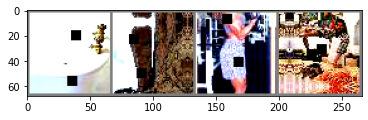

In [67]:
import torchvision
import general_utils

# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()
print(images.shape)
# show images
general_utils.imshow(torchvision.utils.make_grid(images))
print('     ','      '.join('%5s' % classes[maps[(labels[j]).item()]] for j in range(4)))

#Importing torch Summary

In [13]:
from Model_ import resnet as res
from torchsummary import summary
import cudas
import torch

device = torch.device("cuda" if cudas.cuda else "cpu")
net = res.ResNet18().to(device)
summary(net, input_size=(3, 64, 64))

CUDA Available? True
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-

#Define few imports

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch_lr_finder import LRFinder
import torch.optim as optim
import torch.nn as nn

#Set training params to find max LR

In [0]:
net = res.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-2, momentum=0.9, weight_decay=0.0025)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=1.2)

#scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.02, max_lr=0.05, step_size_up=5/24, step_size_down=20/24, mode='triangular')
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

#Keep increasing learning rate with epoch to figure out max LR

In [0]:
import torch
from tqdm import tqdm
from Train_Test_utils.traine import train
from Train_Test_utils.teste import test
test_acc = []
train_acc = []
trainloss_ = []
testloss_ = []
lr_ = []
loss=1000
loss1= 1000
for epoch in range(20):  # loop over the dataset multiple times
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
      lr_.append(param_group['lr'])
    trainacc, loss = train(net, device, trainloader, optimizer, criterion, epoch)
    train_acc.append(trainacc)
    testacc, loss1 = test(net, device, testloader, criterion)
    test_acc.append(testacc)
    trainloss_.append(loss)
    testloss_.append(loss1)
    scheduler.step()
print('Finished Training')

  0%|          | 0/301 [00:00<?, ?it/s]

lr=  0.01


Epoch= 0 Loss=3.9802682399749756 Batch_id=300 Accuracy=19.00: 100%|██████████| 301/301 [02:56<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.102003 Test Accuracy= 11.933333333333334
lr=  0.012


Epoch= 1 Loss=3.5652694702148438 Batch_id=300 Accuracy=18.50: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.594938 Test Accuracy= 17.884848484848487
lr=  0.0144


Epoch= 2 Loss=3.409792184829712 Batch_id=300 Accuracy=22.50: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.3861563 Test Accuracy= 22.766666666666666
lr=  0.01728


Epoch= 3 Loss=3.1873583793640137 Batch_id=300 Accuracy=27.00: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.7553961 Test Accuracy= 23.145454545454545
lr=  0.020736


Epoch= 4 Loss=3.15095853805542 Batch_id=300 Accuracy=34.00: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.2992878 Test Accuracy= 27.412121212121214
lr=  0.0248832


Epoch= 5 Loss=3.0041894912719727 Batch_id=300 Accuracy=33.00: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.8274236 Test Accuracy= 28.318181818181817
lr=  0.02985984


Epoch= 6 Loss=2.7241735458374023 Batch_id=300 Accuracy=45.00: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.1278076 Test Accuracy= 29.496969696969696
lr=  0.035831808


Epoch= 7 Loss=2.9669508934020996 Batch_id=300 Accuracy=35.50: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.9010005 Test Accuracy= 31.421212121212122
lr=  0.0429981696


Epoch= 8 Loss=2.8583436012268066 Batch_id=300 Accuracy=41.50: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.861563 Test Accuracy= 29.536363636363635
lr=  0.05159780351999999


Epoch= 9 Loss=2.698913335800171 Batch_id=300 Accuracy=46.00: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.9675977 Test Accuracy= 28.696969696969695
lr=  0.06191736422399999


Epoch= 10 Loss=2.998929023742676 Batch_id=300 Accuracy=36.50: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.3229249 Test Accuracy= 28.21212121212121
lr=  0.07430083706879999


Epoch= 11 Loss=3.172025203704834 Batch_id=300 Accuracy=37.00: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.4697092 Test Accuracy= 25.86969696969697
lr=  0.08916100448255998


Epoch= 12 Loss=3.0554800033569336 Batch_id=300 Accuracy=36.50: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.649613 Test Accuracy= 20.73939393939394
lr=  0.10699320537907198


Epoch= 13 Loss=2.935908555984497 Batch_id=300 Accuracy=41.50: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.383109 Test Accuracy= 21.86060606060606
lr=  0.12839184645488635


Epoch= 14 Loss=3.0484349727630615 Batch_id=300 Accuracy=31.50: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.4662974 Test Accuracy= 21.66060606060606
lr=  0.15407021574586363


Epoch= 15 Loss=3.380025625228882 Batch_id=300 Accuracy=30.00: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.8101363 Test Accuracy= 19.075757575757574
lr=  0.18488425889503635


Epoch= 16 Loss=3.43516206741333 Batch_id=300 Accuracy=35.00: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.3563538 Test Accuracy= 14.287878787878787
lr=  0.2218611106740436


Epoch= 17 Loss=3.871842861175537 Batch_id=300 Accuracy=24.00: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.1965294 Test Accuracy= 13.033333333333333
lr=  0.2662333328088523


Epoch= 18 Loss=3.7674813270568848 Batch_id=300 Accuracy=28.50: 100%|██████████| 301/301 [02:55<00:00,  1.71it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.216029 Test Accuracy= 12.787878787878787
lr=  0.31947999937062277


Epoch= 19 Loss=3.985830068588257 Batch_id=300 Accuracy=20.50: 100%|██████████| 301/301 [02:55<00:00,  1.72it/s]
100%|██████████| 129/129 [00:22<00:00,  5.78it/s]

Test Loss= 4.5044856 Test Accuracy= 8.878787878787879
Finished Training


#Accuracy vs LR plot as mentioned in lecture

Text(0, 0.5, 'Accuracy')

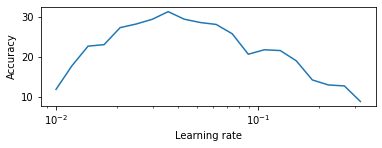

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
line, = ax.plot(lr_, test_acc)
ax.set_xscale('log')
ax.set_xlabel("Learning rate")
ax.set_ylabel("Accuracy")

#Training the classifier with maxlr obtained above

In [0]:
net = res.ResNet18().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.0025)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.05, step_size_up=5, step_size_down=20, mode='triangular2')

In [17]:
import torch
from tqdm import tqdm
from Train_Test_utils.traine import train
from Train_Test_utils.teste import test
test_acc = []
train_acc = []
trainloss_ = []
testloss_ = []
lr_ = []
loss=1000
loss1= 1000
prev_loss1=1000
nn.Dropout2d
for epoch in range(50):  # loop over the dataset multiple times
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
      lr_.append(param_group['lr'])
    trainacc, loss = train(net, device, trainloader, optimizer, criterion, epoch)
    train_acc.append(trainacc)
    testacc, loss1 = test(net, device, testloader, criterion)
    test_acc.append(testacc)
    trainloss_.append(loss)
    testloss_.append(loss1)
    scheduler.step()
print('Finished Training')

  0%|          | 0/301 [00:00<?, ?it/s]

lr=  0.001


Epoch= 0 Loss=4.723742485046387 Batch_id=300 Accuracy=7.00: 100%|██████████| 301/301 [02:57<00:00,  1.69it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.822025 Test Accuracy= 5.957575757575758
lr=  0.010800000000000008


Epoch= 1 Loss=3.8782074451446533 Batch_id=300 Accuracy=21.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.075958 Test Accuracy= 12.206060606060607
lr=  0.020600000000000018


Epoch= 2 Loss=3.4029440879821777 Batch_id=300 Accuracy=24.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 4.1290784 Test Accuracy= 13.83030303030303
lr=  0.030400000000000028


Epoch= 3 Loss=3.2455451488494873 Batch_id=300 Accuracy=34.00: 100%|██████████| 301/301 [02:57<00:00,  1.69it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.827808 Test Accuracy= 19.675757575757576
lr=  0.040199999999999986


Epoch= 4 Loss=3.129939079284668 Batch_id=300 Accuracy=37.50: 100%|██████████| 301/301 [02:57<00:00,  1.69it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.5017626 Test Accuracy= 25.203030303030303
lr=  0.04999999999999999


Epoch= 5 Loss=3.083682060241699 Batch_id=300 Accuracy=37.00: 100%|██████████| 301/301 [02:57<00:00,  1.69it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.9828744 Test Accuracy= 27.524242424242424
lr=  0.04755


Epoch= 6 Loss=2.8024280071258545 Batch_id=300 Accuracy=41.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.975987 Test Accuracy= 29.35151515151515
lr=  0.0451


Epoch= 7 Loss=2.7557907104492188 Batch_id=300 Accuracy=43.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.1101956 Test Accuracy= 30.275757575757577
lr=  0.042649999999999993


Epoch= 8 Loss=2.605893611907959 Batch_id=300 Accuracy=46.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 3.0706856 Test Accuracy= 32.71515151515152
lr=  0.04020000000000001


Epoch= 9 Loss=2.7036471366882324 Batch_id=300 Accuracy=46.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.8108647 Test Accuracy= 34.78181818181818
lr=  0.037750000000000006


Epoch= 10 Loss=2.2705423831939697 Batch_id=300 Accuracy=56.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.5412383 Test Accuracy= 38.31212121212121
lr=  0.035300000000000005


Epoch= 11 Loss=2.4760167598724365 Batch_id=300 Accuracy=53.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.8199728 Test Accuracy= 35.57575757575758
lr=  0.032850000000000004


Epoch= 12 Loss=2.4479775428771973 Batch_id=300 Accuracy=55.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.591497 Test Accuracy= 38.342424242424244
lr=  0.0304


Epoch= 13 Loss=2.273848056793213 Batch_id=300 Accuracy=57.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2667723 Test Accuracy= 41.57272727272727
lr=  0.02795


Epoch= 14 Loss=2.28551983833313 Batch_id=300 Accuracy=57.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3667014 Test Accuracy= 40.875757575757575
lr=  0.025499999999999995


Epoch= 15 Loss=2.0303499698638916 Batch_id=300 Accuracy=65.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4599297 Test Accuracy= 44.81212121212121
lr=  0.023049999999999994


Epoch= 16 Loss=2.074119806289673 Batch_id=300 Accuracy=58.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.5683181 Test Accuracy= 40.163636363636364
lr=  0.020599999999999993


Epoch= 17 Loss=1.9685864448547363 Batch_id=300 Accuracy=65.50: 100%|██████████| 301/301 [02:57<00:00,  1.69it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3241432 Test Accuracy= 42.872727272727275
lr=  0.018150000000000003


Epoch= 18 Loss=1.994104027748108 Batch_id=300 Accuracy=60.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1342413 Test Accuracy= 42.88181818181818
lr=  0.0157


Epoch= 19 Loss=1.6689127683639526 Batch_id=300 Accuracy=67.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1907737 Test Accuracy= 49.04545454545455
lr=  0.013249999999999998


Epoch= 20 Loss=1.5751630067825317 Batch_id=300 Accuracy=71.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2022498 Test Accuracy= 48.35454545454545
lr=  0.010800000000000008


Epoch= 21 Loss=1.6160056591033936 Batch_id=300 Accuracy=68.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.0375896 Test Accuracy= 51.45454545454545
lr=  0.008350000000000007


Epoch= 22 Loss=1.4178341627120972 Batch_id=300 Accuracy=71.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.8794599 Test Accuracy= 51.63333333333333
lr=  0.005900000000000004


Epoch= 23 Loss=1.3080949783325195 Batch_id=300 Accuracy=73.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.7448409 Test Accuracy= 54.11818181818182
lr=  0.003450000000000002


Epoch= 24 Loss=1.1899232864379883 Batch_id=300 Accuracy=78.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.81284 Test Accuracy= 58.00606060606061
lr=  0.001


Epoch= 25 Loss=1.04958975315094 Batch_id=300 Accuracy=76.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.4779216 Test Accuracy= 59.99393939393939
lr=  0.005900000000000004


Epoch= 26 Loss=1.3875573873519897 Batch_id=300 Accuracy=75.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.8926611 Test Accuracy= 54.518181818181816
lr=  0.010800000000000008


Epoch= 27 Loss=1.6040681600570679 Batch_id=300 Accuracy=72.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.079876 Test Accuracy= 49.24848484848485
lr=  0.015700000000000013


Epoch= 28 Loss=1.729540228843689 Batch_id=300 Accuracy=71.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1332514 Test Accuracy= 46.90909090909091
lr=  0.020600000000000018


Epoch= 29 Loss=1.6924805641174316 Batch_id=300 Accuracy=72.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.5015972 Test Accuracy= 44.00909090909091
lr=  0.025499999999999995


Epoch= 30 Loss=1.7906516790390015 Batch_id=300 Accuracy=68.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.355158 Test Accuracy= 45.09090909090909
lr=  0.024274999999999994


Epoch= 31 Loss=1.6058164834976196 Batch_id=300 Accuracy=75.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3827412 Test Accuracy= 46.61515151515152
lr=  0.023049999999999994


Epoch= 32 Loss=1.5631364583969116 Batch_id=300 Accuracy=76.00: 100%|██████████| 301/301 [02:57<00:00,  1.69it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.3414145 Test Accuracy= 45.00606060606061
lr=  0.021824999999999994


Epoch= 33 Loss=1.7925416231155396 Batch_id=300 Accuracy=73.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.8111637 Test Accuracy= 47.981818181818184
lr=  0.020599999999999993


Epoch= 34 Loss=1.5431994199752808 Batch_id=300 Accuracy=77.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2931955 Test Accuracy= 48.127272727272725
lr=  0.019375000000000003


Epoch= 35 Loss=1.5710376501083374 Batch_id=300 Accuracy=72.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.247571 Test Accuracy= 47.00909090909091
lr=  0.018150000000000003


Epoch= 36 Loss=1.5203830003738403 Batch_id=300 Accuracy=76.00: 100%|██████████| 301/301 [02:57<00:00,  1.69it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.4570084 Test Accuracy= 47.56363636363636
lr=  0.016925000000000003


Epoch= 37 Loss=1.7097218036651611 Batch_id=300 Accuracy=74.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.20582 Test Accuracy= 47.6030303030303
lr=  0.0157


Epoch= 38 Loss=1.3243616819381714 Batch_id=300 Accuracy=80.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1356404 Test Accuracy= 49.76969696969697
lr=  0.014474999999999998


Epoch= 39 Loss=1.3705865144729614 Batch_id=300 Accuracy=78.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.2949429 Test Accuracy= 50.58181818181818
lr=  0.013249999999999998


Epoch= 40 Loss=1.3246338367462158 Batch_id=300 Accuracy=79.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.1282043 Test Accuracy= 52.275757575757574
lr=  0.012025000000000011


Epoch= 41 Loss=1.4610378742218018 Batch_id=300 Accuracy=80.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.130007 Test Accuracy= 53.06666666666667
lr=  0.010800000000000008


Epoch= 42 Loss=1.1923401355743408 Batch_id=300 Accuracy=82.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.133053 Test Accuracy= 52.54545454545455
lr=  0.009575000000000007


Epoch= 43 Loss=1.3380546569824219 Batch_id=300 Accuracy=77.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.9123318 Test Accuracy= 52.8
lr=  0.008350000000000007


Epoch= 44 Loss=1.0359532833099365 Batch_id=300 Accuracy=85.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.8946526 Test Accuracy= 53.06060606060606
lr=  0.0071250000000000055


Epoch= 45 Loss=0.9269940853118896 Batch_id=300 Accuracy=85.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 2.0168781 Test Accuracy= 55.52121212121212
lr=  0.005900000000000004


Epoch= 46 Loss=0.8529826998710632 Batch_id=300 Accuracy=88.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.916455 Test Accuracy= 56.24242424242424
lr=  0.004675000000000004


Epoch= 47 Loss=0.7541489601135254 Batch_id=300 Accuracy=91.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.8055596 Test Accuracy= 58.29090909090909
lr=  0.003450000000000002


Epoch= 48 Loss=0.6955953240394592 Batch_id=300 Accuracy=89.00: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
  0%|          | 0/301 [00:00<?, ?it/s]

Test Loss= 1.5000899 Test Accuracy= 59.487878787878785
lr=  0.0022250000000000013


Epoch= 49 Loss=0.5942960977554321 Batch_id=300 Accuracy=91.50: 100%|██████████| 301/301 [02:57<00:00,  1.70it/s]
100%|██████████| 129/129 [00:31<00:00,  4.07it/s]

Test Loss= 1.5306351 Test Accuracy= 60.64242424242424
Finished Training


#Lr vs Epoch plot 

Text(0, 0.5, 'Epoch')

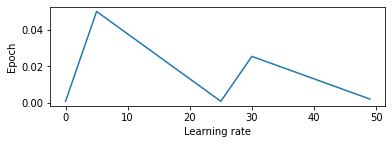

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
line, = ax.plot(lr_)
ax.set_xlabel("Learning rate")
ax.set_ylabel("Epoch")

#Plot Train/Test Accuracy and loss

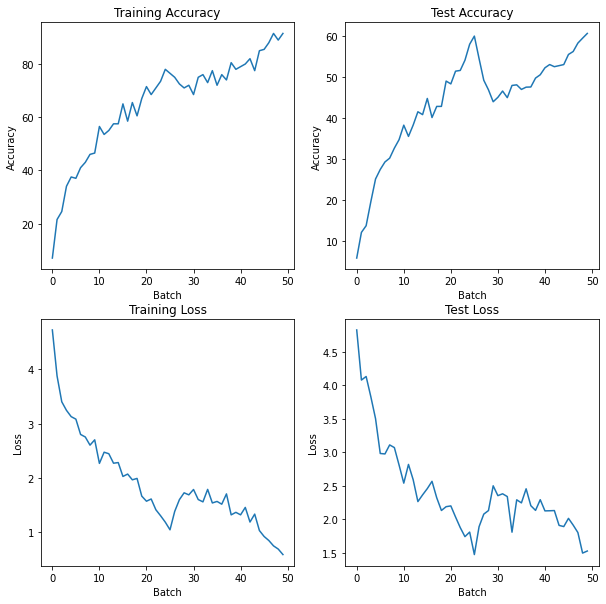

In [19]:
general_utils.plot_acc_loss(train_acc, test_acc, trainloss_, testloss_)

#Groundtruth vs Predictions

GT    hourglass      organ, pipe organ      Christmas stocking      magnetic compass
Pred  hourglass      organ, pipe organ      Christmas stocking      magnetic compass


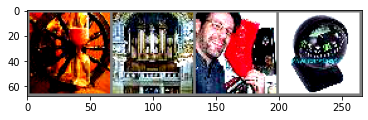

In [70]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

# print images
general_utils.imshow(torchvision.utils.make_grid(images))
print('GT   ', '      '.join('%5s' % classes[maps[labels[j].item()]] for j in range(4)))

outputs = net(images.cuda())
_, predicted = torch.max(outputs, 1)
print('Pred ', '      '.join('%5s' % classes[maps[predicted[j].item()]] for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



#Gradcam

In [7]:
# get the image from the dataloader
testset =  data.getTestDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)
it = iter(testloader2)

Test Data size 33000


#Classified Images

/content/gdrive/My Drive/Assignment/gradcame.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=3)


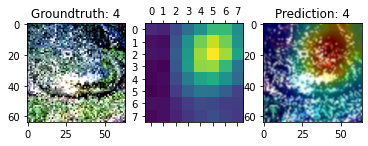

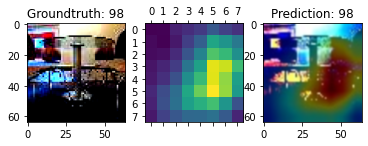

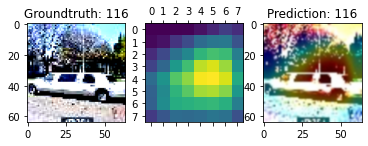

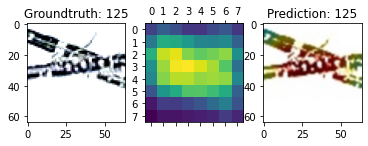

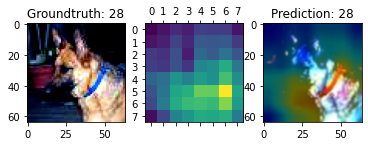

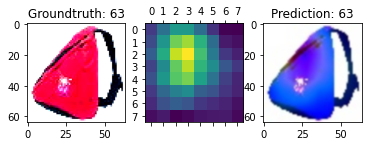

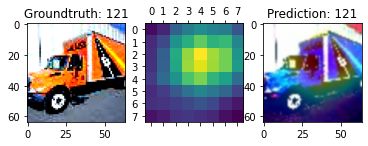

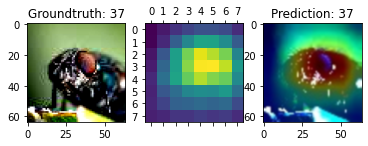

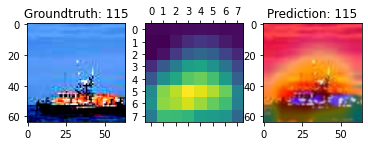

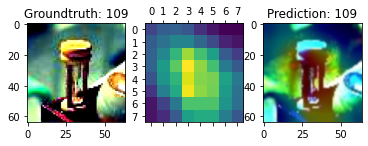

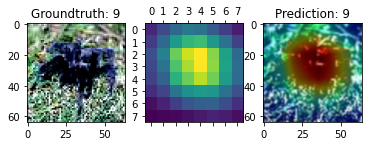

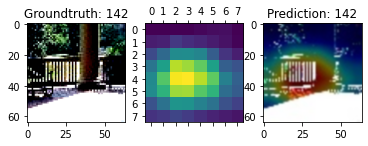

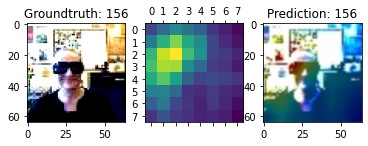

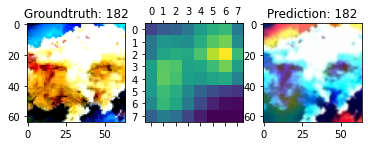

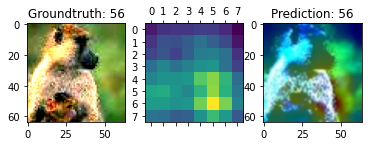

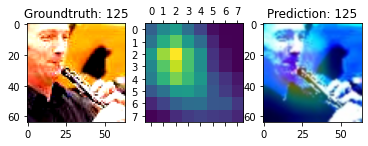

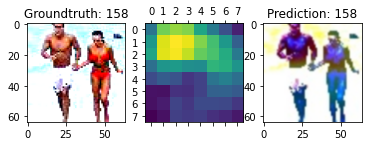

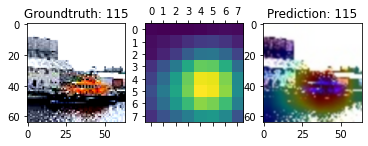

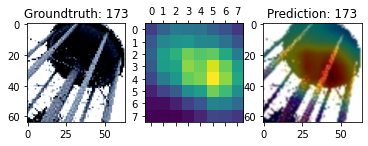

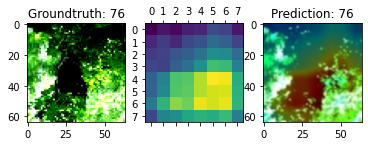

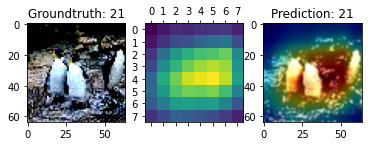

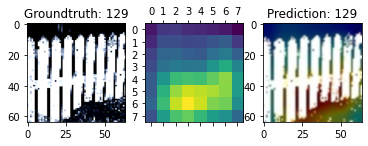

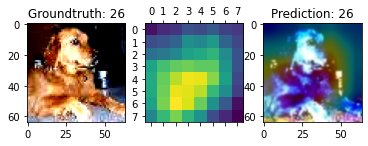

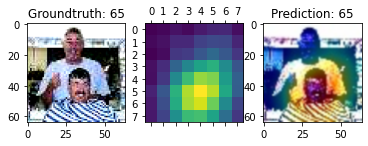

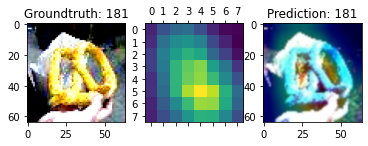

In [29]:
import gradcame
count = 0
classes = []
while(count != 25):
    images, labels = it.next()
    output = net(images.cuda())
    pred = output.argmax(dim=1, keepdim=True)
    #print(pred.cpu().item(), labels.item())
    if(pred.cpu().item() == labels.item()):
      gradcame.gradcamof(net, images, classes, str(labels.item()), str(pred.cpu().item()))
      count=count+1

In [11]:
print(classes[maps[4-1]])
print(classes[maps[98-1]])
print(classes[maps[116-1]])
print(classes[maps[125-1]])
print(classes[maps[28-1]])
print(classes[maps[63-1]])
print(classes[maps[121-1]])
print(classes[maps[37-1]])
print(classes[maps[115-1]])
print(classes[maps[109-1]])
print(classes[maps[9-1]])
print(classes[maps[142-1]])
print(classes[maps[156-1]])
print(classes[maps[182-1]])
print(classes[maps[115-1]])
print(classes[maps[56-1]])
print(classes[maps[125-1]])
print(classes[maps[158-1]])

tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui
desk
lifeboat
obelisk
Labrador retriever
apron
miniskirt, mini
ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle
lawn mower, mower
gondola
black widow, Latrodectus mactans
remote control, remote
stopwatch, stop watch
pretzel
lawn mower, mower
chimpanzee, chimp, Pan troglodytes
obelisk
suspension bridge
